<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

#__Activity__: 
For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.




In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

pi=np.pi
xk= np.linspace(-pi/4 ,pi/4,10)          # Estas dos lineas corresponden a la definición de los arreglos que constituyen los 10 puntos en el plano, que coinciden con la función dada.
yk=np.tan(xk)                                      # 



x=np.linspace(-pi/4 ,pi/4)               # Dominio de valores "continuos" para f(x)= tanx


y=np.tan(x)
P=sc.interpolate.lagrange(xk,yk)

print(P)
P[8]





         9             8           7             6          5
0.03841 x + 9.415e-14 x + 0.04652 x + 2.487e-14 x + 0.1345 x
              4          3             2
 + 1.799e-14 x + 0.3333 x + 4.718e-15 x + 1 x - 2.884e-17


9.414691248821327e-14

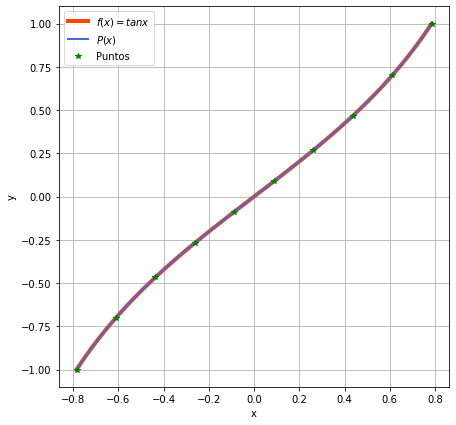

In [ ]:
plt.figure(figsize=(7,7))

plt.plot(x,y,label='$f(x) = tanx$',color='orangered',linewidth=4)
plt.plot(x,P(x),label='$P(x)$', color='royalblue', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xk,yk,'g*',label='Puntos')
plt.grid()
plt.legend()


#__Activity__:  
**Movement with uniform acceleration**

1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second car passes for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# 1. Definición del polinomio para la posicion de un cuerpo con MUA:

def X(t0,x0,v0,a):
  posx= np.poly1d([(1/2)*a,(v0 - a*t0),x0-v0*t0+(1/2)*a*t0**2], variable='t')
  

  return posx

X



<function __main__.X(t0, x0, v0, a)>

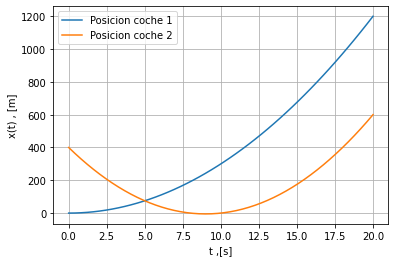

In [19]:
# 2. Datos del problema:

# Carro 1:
t01 = 0  # Tiempo inicial, [s]
x01 = 0  # Posición inicial, [m]
v01 = 0  # Velocidad inicial, [m/s]
a1 = 6   # Aceleración, [m/s^2]

params1 =(t01,x01,v01,a1)



# Carro 2:
t02 = 10 # Tiempo inicial, [s]
x02 = 0  # Posición inicial, [m]
v02 = 10 # Velocidad inicial, [m/s]
a2 = 10  # Aceleración, [m/s^2]

params2 =(t02,x02,v02,a2)



time=np.linspace(0,20)




# Gráfica de las posiciones de los coches en función del tiempo

plt.plot(time,X(*params1)(time), label='Posicion coche 1')
plt.xlabel('t ,[s]')
plt.ylabel('x(t) , [m]')
plt.plot(time,X(*params2)(time), label='Posicion coche 2')
plt.grid()
plt.legend()

In [7]:
# Definamos la siguiente función como la resta de las posiciones de los dos coches y encontremos el tempo para el cual dicha funcion es cero.

h = lambda t : X(*params1)(t) -   X(*params2)(t) 


# Apliquemos el método de la bisección para determinar el cero de la función h:
a=2.5
b=7.5

t_sol = sc.optimize.bisect(h,a,b)


print(f'Ambos vehículos se encontrarían  {t_sol} s después de que haya partido el primero de ellos,''\n'f'a {X(*params1)(t_sol)} m del punto de salida. Pero como el segundo carro parte 10 segundos después,''\n''ambos no se volverán a topar ')



Ambos vehículos se encontrarían  5.0 s después de que haya partido el primero de ellos,
a 75.0 m del punto de salida. Pero como el segundo carro parte 10 segundos después,
ambos no se volverán a topar 


#__Activity__: 

 **Apply lagrange interpolations with the following points, work with pandas data frame:**

x = np.array([1, 1.3, 1.6, 1.9, 2.2])

fx = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623]) 

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


x= np.array([1, 1.3, 1.6, 1.9, 2.2])
fx=np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

p_lagrange = sc.interpolate.lagrange(x,fx)

print(p_lagrange)


          4           3         2
0.001825 x + 0.05529 x - 0.343 x + 0.07339 x + 0.9777


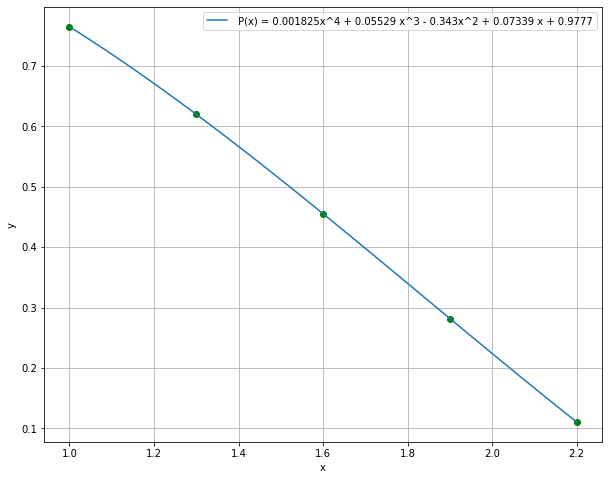

In [ ]:
# Gráfico de los puntos y de sus polinomio interpolador de lagrange

plt.figure(figsize=(10,8))
plt.plot(x,fx,'go')
plt.plot(np.linspace(1,2.2),p_lagrange(np.linspace(1,2.2)),label=' P(x) = 0.001825x^4 + 0.05529 x^3 - 0.343x^2 + 0.07339 x + 0.9777')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()





#__Activity__: 

Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)
1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# Coordenadas de los pixeles de la imagen del contorno del domo del planetario
xk=np.array([368,372,383,408,450,516,574,640,697,736,758,764,767])
yk=np.array([229,197,165,120,84,49,44,59,95,136,185,218,247])



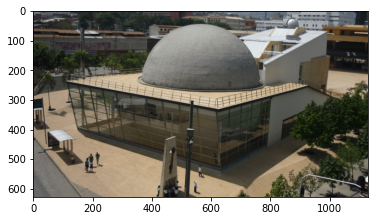

In [ ]:
# Alternativa para subir una imagen y manipularla como un objeto de matplotlib:

import requests
from PIL import Image
from io import BytesIO



url="https://www.turismodeestrellas.com/media/files/1973_planetario-medellin.jpg"
response=requests.get(url)
immg=Image.open(BytesIO(response.content))
planetario=np.array(immg)
plt.imshow(planetario)

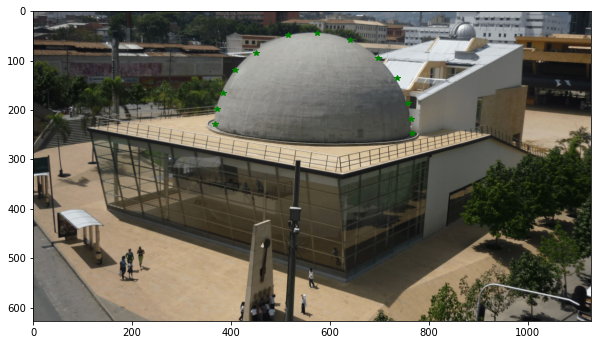

In [ ]:
plt.figure(figsize=(10, 8))
#im= plt.imread("planetario.jpg")
plt.imshow(planetario)
plt.plot(xk,yk,'*g')


In [ ]:
# Definamos el polinomio de lagrange que pase por el conjunto de puntos definidos anteriormente:

x=np.linspace(xk.min(),xk.max())
poly= sc.interpolate.lagrange(xk,yk)

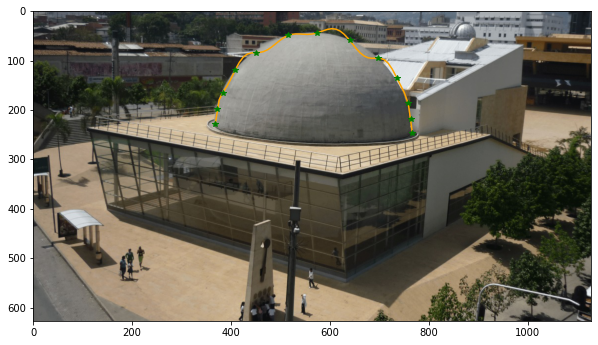

In [ ]:
plt.figure(figsize=(10, 8))
#im= plt.imread("planetario.jpg")
plt.imshow(planetario)


plt.plot(x,poly(x),color='orange')
plt.plot(xk,yk,"g*")

In [ ]:
# Proceso de interpolación mediante splines cúbicos:

x=np.linspace(xk.min(),xk.max())
pcs=sc.interpolate.CubicSpline(xk,yk)

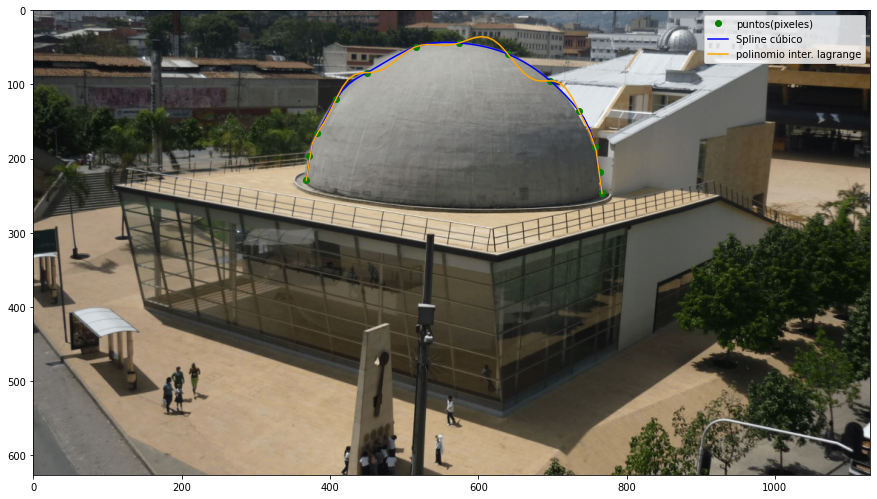

In [ ]:

fig, ax = plt.subplots(figsize=(15, 10))

#im= plt.imread("planetario.jpg")
plt.imshow(planetario)

ax.plot(xk, yk, 'go', label='puntos(pixeles)')
ax.plot(x, pcs(x), label='Spline cúbico',color='blue')
ax.plot(x, poly(x), label="polinomio inter. lagrange",color='orange')

plt.legend()
plt.show()


In [ ]:
type(pcs)


scipy.interpolate._cubic.CubicSpline